In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_directory="./data"
data=pd.read_csv(data_directory+"/data_prep_wo_trend.csv")

In [5]:
data.shape

(99956, 33)

In [6]:
data.head()

,Unnamed: 0,Sale Price,Pct_change,Days Since Release,yeezy,airjordan,airforce,airmax90,airmax97,presto,...,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,size_freq
0,0,1097.0,3.986364,342.0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1857,0.137591
1,1,685.0,2.113636,282.0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,560,0.137591
2,2,690.0,2.136364,282.0,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,520,0.137591
3,3,1075.0,3.886364,282.0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808,0.137591
4,4,828.0,2.763636,202.0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2153,0.137591


In [7]:
data=data[data.columns[2:]]

In [8]:
data.head()

,Pct_change,Days Since Release,yeezy,airjordan,airforce,airmax90,airmax97,presto,vapormax,blazer,...,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,size_freq
0,3.986364,342.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1857,0.137591
1,2.113636,282.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,560,0.137591
2,2.136364,282.0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,520,0.137591
3,3.886364,282.0,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808,0.137591
4,2.763636,202.0,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2153,0.137591


In [18]:
styles=["yeezy","airjordan","airforce","airmax90","airmax97","presto","vapormax","blazer","zoom","react"]
colors=["Black","White","Grey","Red","Green","Neo","Orange","Tan/Brown","Pink","Blue","Colorful"]
states=["California","New York","Oregon","Florida","Texas","Other States"]

In [19]:
def new_column(x,category):
    for i in category:
        if x[i]==1:
            outcome=i
        else:
            next
    return outcome

In [12]:
data["state"]=data.apply(lambda x: new_column(x,states),axis=1)

In [20]:
data["style"]=data.apply(lambda x: new_column(x,styles),axis=1)

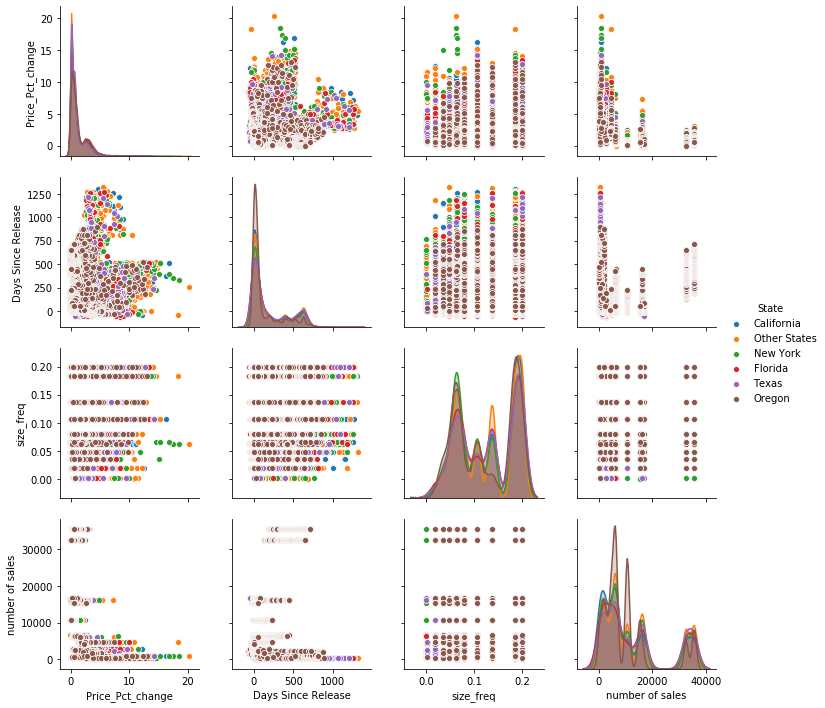

In [33]:
df_cor= pd.DataFrame(zip(data['Pct_change'],
                      data['Days Since Release'],
                      data['state'],
                      data['size_freq'],
                      data['Number of Sales']
                         ),
                      columns=['Price_Pct_change', 'Days Since Release', 'State','size_freq','number of sales'])

sns.pairplot(df_cor,hue="State")
plt.show()

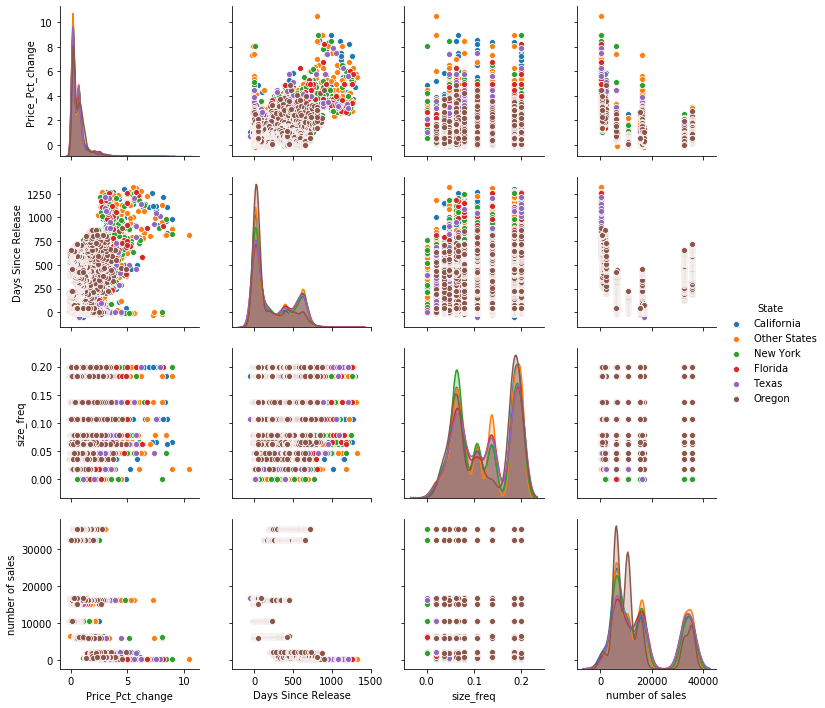

In [32]:
df_yeezy=data[data["yeezy"]==1]
df_yeezy_cor = pd.DataFrame(zip(df_yeezy['Pct_change'],
                      df_yeezy['Days Since Release'],
                      df_yeezy['state'],
                      df_yeezy['size_freq'],
                      df_yeezy['Number of Sales']
                         ),
                      columns=['Price_Pct_change', 'Days Since Release', 'State','size_freq','number of sales'])

sns.pairplot(df_yeezy_cor,hue="State")
plt.show()

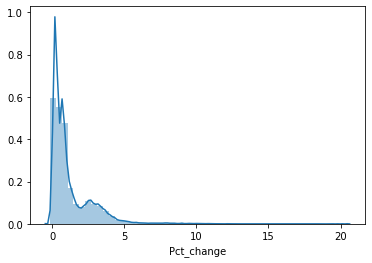

In [36]:
sns.distplot(data["Pct_change"])
plt.show()

## LR with Lasso

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import KFold

In [43]:
seed=26440
np.random.seed(seed)

In [41]:
#cross_validation_function
def cross_validation(model,X,Y,folds,verbose=False):
    if verbose:
        print("\tfold,train r2, val r2")
    kfolds=len(folds)
    train_performance=np.empty(kfolds)
    validation_performance=np.empty(kfolds)
    for idx in range(kfolds):
        train,validation=folds[idx]
        X_train=X[train]
        Y_train=Y[train]
        model.fit(X_train,Y_train)
        train_r2=model.score(X_train,Y_train)
        train_performance[idx]=train_r2
        X_validation=X[validation]
        Y_validation=Y[validation]
        validation_r2=model.score(X_validation,Y_validation)
        validation_performance[idx]=validation_r2
        if verbose:
            print("\t",idx,train_r2,validation_r2)
    return np.mean(validation_performance),np.std(validation_performance)

In [47]:
data_directory="./data"
data=pd.read_csv(data_directory+"/data_prep_wo_trend.csv")

In [49]:
data=data[data.columns[2:]]

In [51]:
data,data_test=train_test_split(data,test_size=0.25,shuffle=True)
len(data),len(data_test)

(74967, 24989)

In [53]:
target="Pct_change"
variables=data.columns[1:]

In [54]:
Y=data[target].values # transform into doubles to avoid warnings later
X=data[variables].values

Y_test=data_test[target].values
X_test=data_test[variables].values

X.shape,Y.shape,X_test.shape,Y_test.shape

((74967, 30), (74967,), (24989, 30), (24989,))

In [58]:
base_model=linear_model.Lasso(alpha=0.01,max_iter=10000)
base_model.fit(X,Y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
nfolds=5
kf=KFold(nfolds,shuffle=False)
folds=list(kf.split(X))

In [59]:
val_r2,std=cross_validation(base_model,X,Y,folds,verbose=True)
print("val r2 =",val_r2,"+/-",std)

	fold,train r2, val r2
	 0 0.7337620282845352 0.7346516554982384
	 1 0.7342161394850837 0.7309234734625585
	 2 0.7335183896913731 0.7373512438096219
	 3 0.7308473245196074 0.7371210526452792
	 4 0.7348991818803848 0.7250865265579447
val r2 = 0.7330267903947286 +/- 0.004595123485465031


In [60]:
base_coefs=base_model.coef_

In [61]:
for i,name in enumerate(variables):
    print(name,base_coefs[i])

Days Since Release 0.00138381469928103
yeezy -1.4943813583902825
airjordan 1.8935535468034617
airforce -0.0
airmax90 0.041971817386114836
airmax97 0.0
presto 1.091794444579513
vapormax -0.6680019346414036
blazer 0.9782311565449768
zoom -1.2416028898197267
react -0.0
California 0.0009779060575231097
New York -0.0
Oregon -0.0
Florida 0.0
Texas -0.0
Other States -0.0
Black 0.022570135197927728
White 0.26644614112996456
Grey -0.0
Red 1.719734172941366
Green 0.0
Neo -0.0
Orange 0.0
Tan/Brown 0.0
Pink 0.0
Blue -0.5805064304002379
Colorful 0.1282297699462676
Number of Sales -4.2562606034046186e-05
size_freq 0.0


In [62]:
#out of sample performance
test_r2=base_model.score(X_test,Y_test)

In [63]:
test_r2

0.7311404487422039